In [6]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np



In [8]:
# Read the dataset and show its features.
sHousePricesFilePath = os.path.join(os.getcwd(), "Housing.csv")
housing_df = pd.read_csv(sHousePricesFilePath)
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Text(0.5, 0, 'Price')

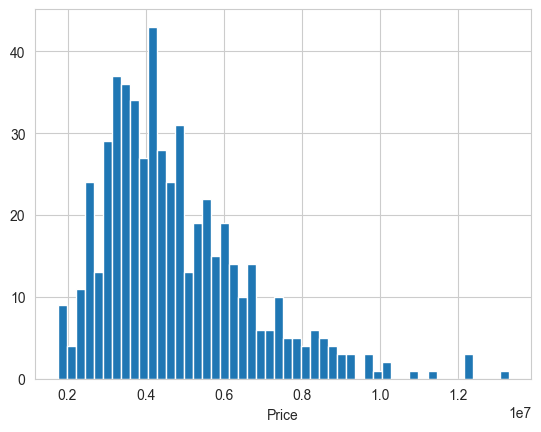

In [13]:
# Plot the data distribution.
plt.hist(housing_df["price"], bins=50)
plt.xlabel("Price")

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

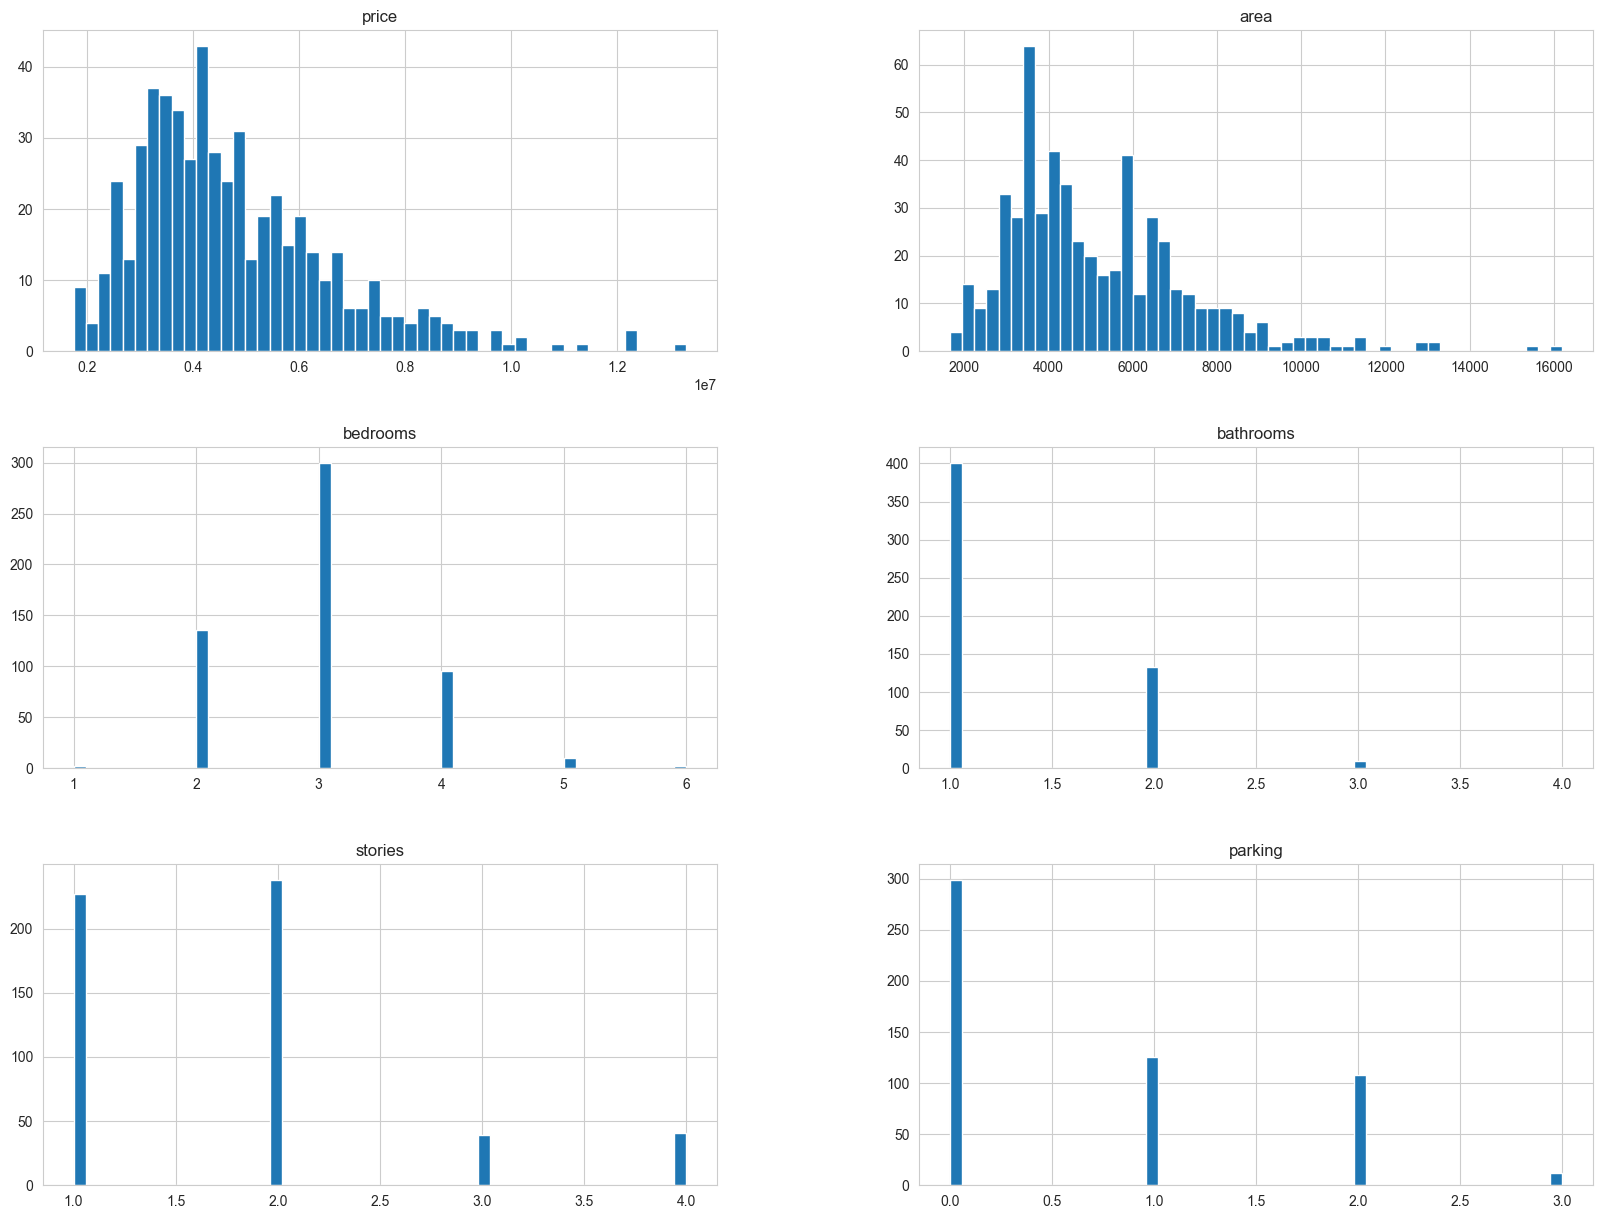

In [14]:
# Plot the histogram of all features.
housing_df.hist(bins=50, figsize=(20, 15))

In [ ]:
# One-hot encode the "mainroad" feature, because learning algorithms cannot operate on categorical features.
housing_df["mainroad"].unique()
mainroad_encoded = pd.get_dummies(housing_df["mainroad"], prefix="mainroad")
print(mainroad_encoded)
housing_df = housing_df.drop(columns=["mainroad"]).join(mainroad_encoded)
print(housing_df.head())


In [ ]:
# One-hot encode the remaining categorical features.
guest_rooms_encoded = pd.get_dummies(housing_df["guestroom"], prefix="guestroom")
basement_encoded = pd.get_dummies(housing_df["basement"], prefix="basement")
hotwaterheating_encoded = pd.get_dummies(housing_df["hotwaterheating"], prefix="hotwaterheating")
airconditioning_encoded = pd.get_dummies(housing_df["airconditioning"], prefix="airconditioning")
prefare_encoded = pd.get_dummies(housing_df["prefarea"], prefix="prefarea")
furnishingstatus_encoded = pd.get_dummies(housing_df["furnishingstatus"], prefix="furnishingstatus")

columns_to_encode = ["guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
columns_encoded = [guest_rooms_encoded, basement_encoded, hotwaterheating_encoded, airconditioning_encoded, prefare_encoded, furnishingstatus_encoded]
housing_df = housing_df.drop(columns=columns_to_encode).join(columns_encoded)
print(housing_df.head())
print(housing_df.info())

In [31]:
# Save the updated DataFrame to a new CSV file.
housing_df.to_csv("housing_updated.csv", index=False)


In [32]:
# Laod from the new CSV file and show its features.
housing_df_updated = pd.read_csv("housing_updated.csv")
print(housing_df_updated.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_no                      545 non-null    bool 
 7   mainroad_yes                     545 non-null    bool 
 8   guestroom_no                     545 non-null    bool 
 9   guestroom_yes                    545 non-null    bool 
 10  basement_no                      545 non-null    bool 
 11  basement_yes                     545 non-null    bool 
 12  hotwaterheating_no               545 non-null    b

In [ ]:
# Calculate the correlation matrix of the updated DataFrame.
corr_updated = housing_df_updated.corr()


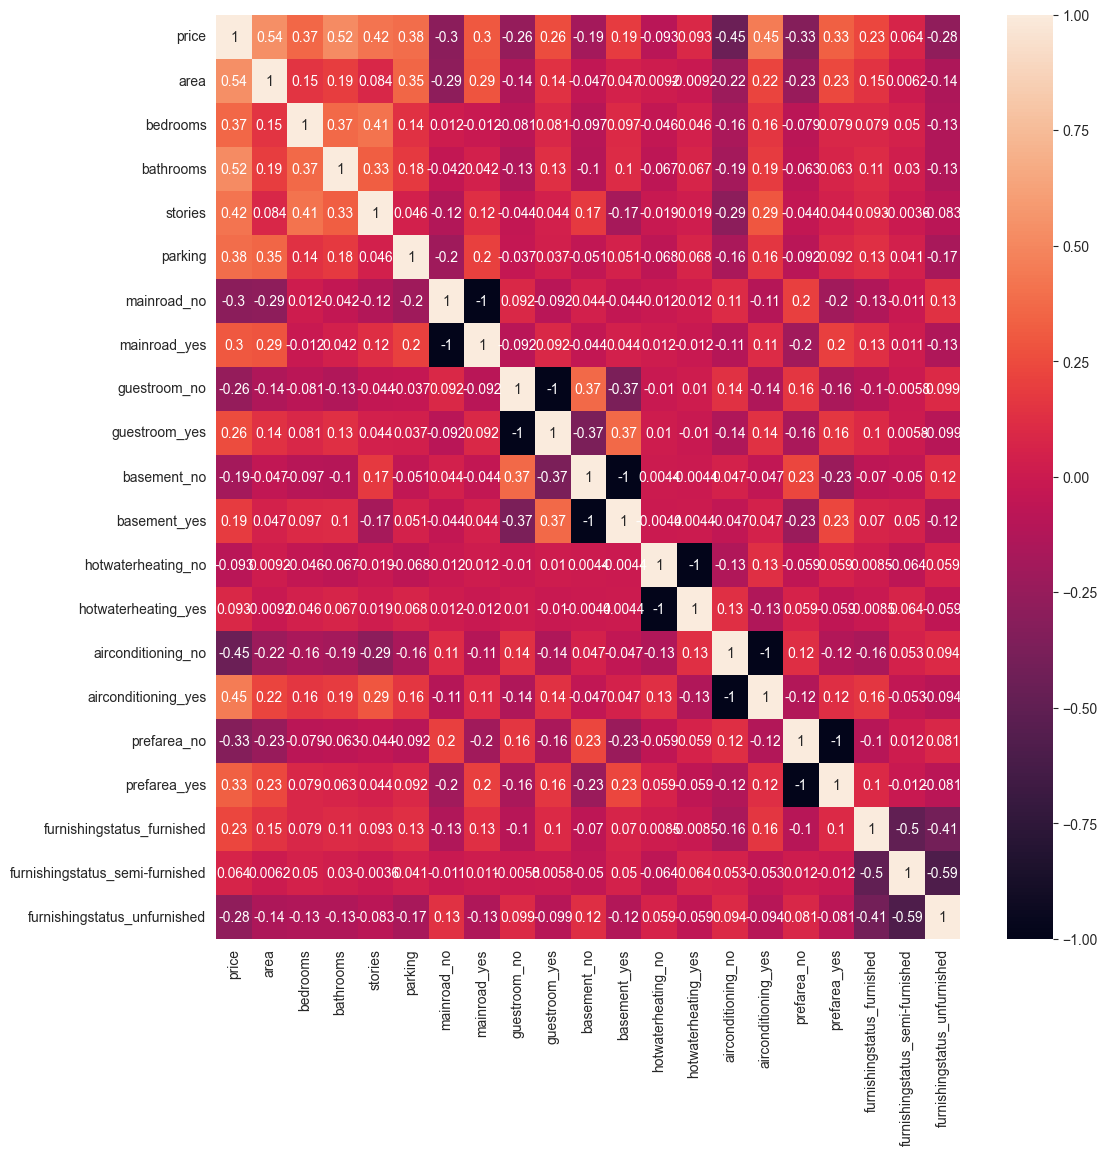

In [36]:
plt.figure(figsize=(12, 12))
sns.heatmap(corr_updated, annot=True)
plt.show()

In [37]:
# Impute missing values
housing_df_updated_tmp = pd.read_csv("housing_updated.csv")
MissingValueColumns = housing_df_updated_tmp.loc[:, housing_df_updated_tmp.isnull().any()]
print(MissingValueColumns)

     bedrooms
0         4.0
1         4.0
2         3.0
3         4.0
4         4.0
..        ...
540       2.0
541       3.0
542       2.0
543       3.0
544       3.0

[545 rows x 1 columns]


In [38]:
lMissingValueColumns = [sCol for sCol in MissingValueColumns]
print(lMissingValueColumns)

['bedrooms']


In [39]:
# Impute the missing values using KNNImputer
from sklearn.impute import KNNImputer

knn=KNNImputer(n_neighbors=3)
knn.fit(housing_df_updated_tmp)

,missing_values,nan
,n_neighbors,3
,weights,'uniform'
,metric,'nan_euclidean'
,copy,True
,add_indicator,False
,keep_empty_features,False


In [45]:
aValues = knn.transform(housing_df_updated_tmp)
housing_df_updated_tmp = pd.DataFrame(aValues, columns = housing_df_updated_tmp.columns)
housing_df_updated_tmp.isnull().sum()
print(housing_df_updated_tmp["bedrooms"])


0      4.0
1      4.0
2      3.0
3      4.0
4      4.0
      ... 
540    2.0
541    3.0
542    2.0
543    3.0
544    3.0
Name: bedrooms, Length: 545, dtype: float64


In [47]:
housing_df_updated_tmp.to_csv("housing_updated_tmp.csv", index=False)

In [ ]:
# Split the data into training and testing sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    housing_df_updated_tmp.drop(columns=["price"]),
    housing_df_updated_tmp["price"],
    test_size=0.3,
    shuffle=True,
)


In [51]:
# Train the model using the linear regresssion algorithm.
from sklearn.linear_model import LinearRegression

# Split the data into features and target variable
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [52]:
# Run the predictions on the test set.
y_pred_test = reg_model.predict(X_test)


In [54]:
# Evaluate the predictions
pred_test_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_test})

pred_test_df

,Actual,Predicted
76,6650000.0,7.208369e+06
69,6790000.0,8.143114e+06
215,4830000.0,3.573121e+06
464,3080000.0,4.792049e+06
98,6293000.0,6.698950e+06
...,...,...
382,3570000.0,3.783416e+06
83,6580000.0,6.749992e+06
258,4480000.0,3.920888e+06
357,3773000.0,4.483251e+06


In [55]:
# Evaluate the model using the R^2 metric.
r2_reg_model_test = round(reg_model.score(X_test, y_test), 2)
print(r2_reg_model_test)


0.67
